In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [231]:
train = pd.read_csv('/Users/tj/Documents/kaggle/train.csv')
test = pd.read_csv('/Users/tj/Documents/kaggle/test.csv')

In [232]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [233]:
print(train.isnull().sum())

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64


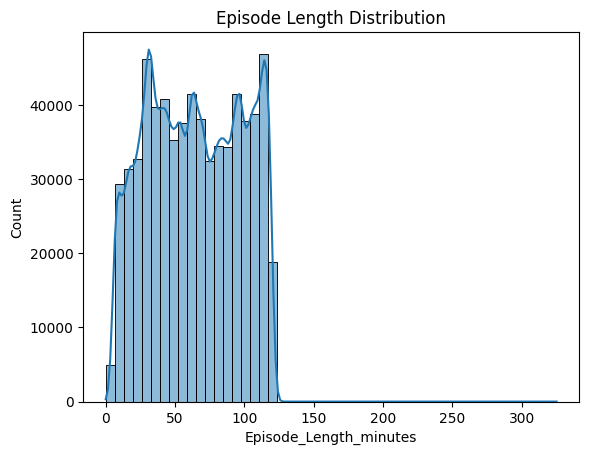

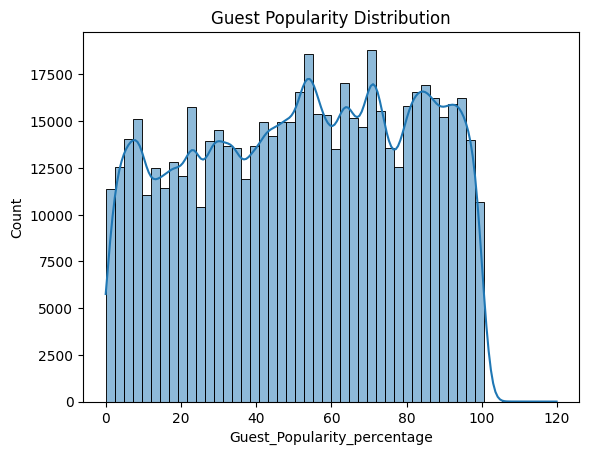

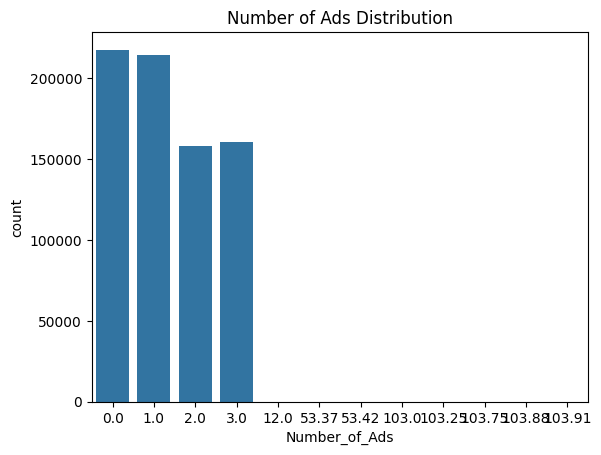

In [234]:
# 1. Episode_Length_minutes
sns.histplot(train['Episode_Length_minutes'].dropna(), bins=50, kde=True)
plt.title('Episode Length Distribution')
plt.show()

# 2. Guest_Popularity_percentage
sns.histplot(train['Guest_Popularity_percentage'].dropna(), bins=50, kde=True)
plt.title('Guest Popularity Distribution')
plt.show()

# 3. Number_of_Ads
sns.countplot(x='Number_of_Ads', data=train)
plt.title('Number of Ads Distribution')
plt.show()

In [235]:
mapping_genre = {"True Crime": 0, "Comedy": 1, "Education": 2, "Technology": 3, "Health": 4, "News": 5, "Music": 6, "Sports": 7, "Business": 8, "Lifestyle": 9}
train["Genre"] = train["Genre"].map(mapping_genre)
test["Genre"] = test["Genre"].map(mapping_genre)

mapping_publication_day = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}
train["Publication_Day"] = train["Publication_Day"].map(mapping_publication_day)
test["Publication_Day"] = test["Publication_Day"].map(mapping_publication_day)

mapping_publication_time = {"Morning": 0, "Afternoon": 1, "Evening": 2, "Night": 3}
train["Publication_Time"] = train["Publication_Time"].map(mapping_publication_time)
test["Publication_Time"] = test["Publication_Time"].map(mapping_publication_time)

mapping_episode_sentiment = {"Negative": 0, "Neutral": 1, "Positive": 2}
train["Episode_Sentiment"] = train["Episode_Sentiment"].map(mapping_episode_sentiment)
test["Episode_Sentiment"] = test["Episode_Sentiment"].map(mapping_episode_sentiment)

In [236]:
# 1. Episode_Length_minutes -> 전체 Median으로 대체
median_episode_length = train['Episode_Length_minutes'].median()
train['Episode_Length_minutes'] = train['Episode_Length_minutes'].fillna(median_episode_length)

# 2. Guest_Popularity_percentage -> 0으로 대체
train['Guest_Popularity_percentage'] = train['Guest_Popularity_percentage'].fillna(0)

# 3. Number_of_Ads -> 0으로 대체
train['Number_of_Ads'] = train['Number_of_Ads'].fillna(0)

median_episode_length = test['Episode_Length_minutes'].median()
test['Episode_Length_minutes'] = test['Episode_Length_minutes'].fillna(median_episode_length)

# 2. Guest_Popularity_percentage -> 0으로 대체
test['Guest_Popularity_percentage'] = test['Guest_Popularity_percentage'].fillna(0)

# 3. Number_of_Ads -> 0으로 대체
test['Number_of_Ads'] = test['Number_of_Ads'].fillna(0)

# 결측치 처리 후 확인
train.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

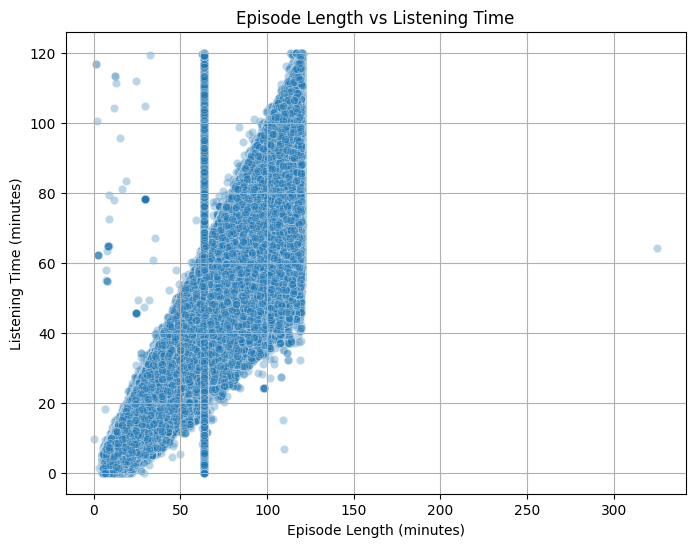

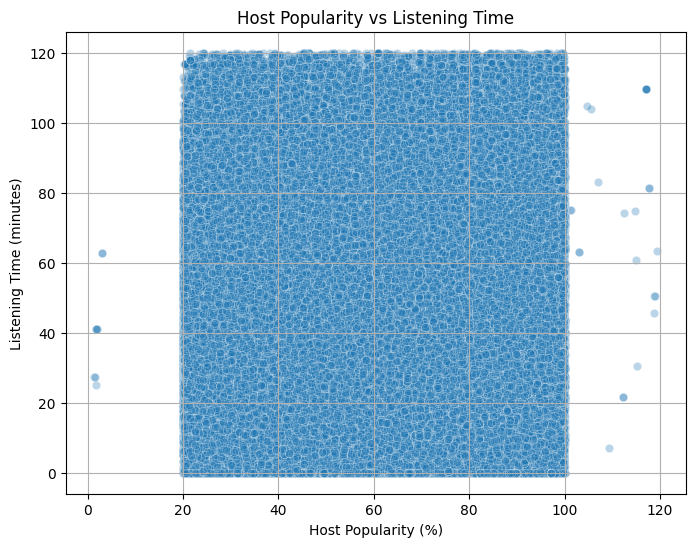

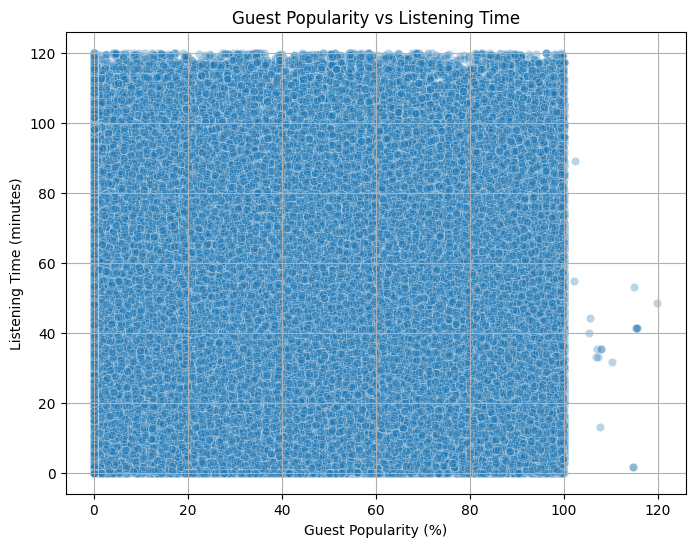

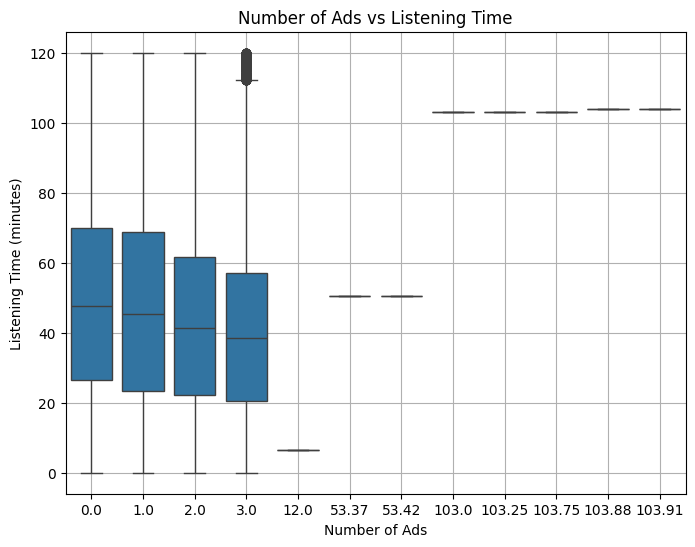

In [237]:
# 1. Episode_Length_minutes vs Listening_Time_minutes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Episode_Length_minutes', y='Listening_Time_minutes', data=train, alpha=0.3)
plt.title('Episode Length vs Listening Time')
plt.xlabel('Episode Length (minutes)')
plt.ylabel('Listening Time (minutes)')
plt.grid(True)
plt.show()

# 2. Host_Popularity_percentage vs Listening_Time_minutes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Host_Popularity_percentage', y='Listening_Time_minutes', data=train, alpha=0.3)
plt.title('Host Popularity vs Listening Time')
plt.xlabel('Host Popularity (%)')
plt.ylabel('Listening Time (minutes)')
plt.grid(True)
plt.show()

# 3. Guest_Popularity_percentage vs Listening_Time_minutes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Guest_Popularity_percentage', y='Listening_Time_minutes', data=train, alpha=0.3)
plt.title('Guest Popularity vs Listening Time')
plt.xlabel('Guest Popularity (%)')
plt.ylabel('Listening Time (minutes)')
plt.grid(True)
plt.show()

# 4. Number_of_Ads vs Listening_Time_minutes
plt.figure(figsize=(8, 6))
sns.boxplot(x='Number_of_Ads', y='Listening_Time_minutes', data=train)
plt.title('Number of Ads vs Listening Time')
plt.xlabel('Number of Ads')
plt.ylabel('Listening Time (minutes)')
plt.grid(True)
plt.show()


In [238]:
# Number_of_Ads 최대값 출력
max_ads = train['Number_of_Ads'].max()
print("Number_of_Ads 최대값:", max_ads)

# 고유 값 확인
unique_ads = train['Number_of_Ads'].unique()
print("Number_of_Ads 고유값:", unique_ads)


Number_of_Ads 최대값: 103.91
Number_of_Ads 고유값: [  0.     2.     3.     1.    53.37 103.91 103.    53.42 103.75  12.
 103.25 103.88]


In [239]:
# Number_of_Ads 클리핑: 3 이상은 모두 3으로 처리
train['Number_of_Ads'] = train['Number_of_Ads'].apply(lambda x: 3 if x > 3 else x)

# 정수형 변환 (선택사항)
train['Number_of_Ads'] = train['Number_of_Ads'].astype(int)
# Host_Popularity_percentage 클리핑
train['Host_Popularity_percentage'] = train['Host_Popularity_percentage'].apply(lambda x: 100 if x > 100 else x)

# Guest_Popularity_percentage 클리핑
train['Guest_Popularity_percentage'] = train['Guest_Popularity_percentage'].apply(lambda x: 100 if x > 100 else x)

# 1. Listening Time > Episode Length 처리
train = train[train['Listening_Time_minutes'] <= train['Episode_Length_minutes']]

# 필요하면 로그 변환용 컬럼 추가 (시각화용)
train['Log_Episode_Length'] = np.log1p(train['Episode_Length_minutes'])
train['Log_Listening_Time'] = np.log1p(train['Listening_Time_minutes'])



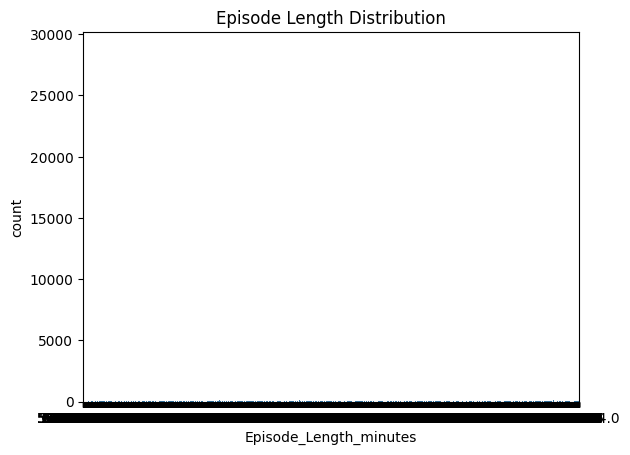

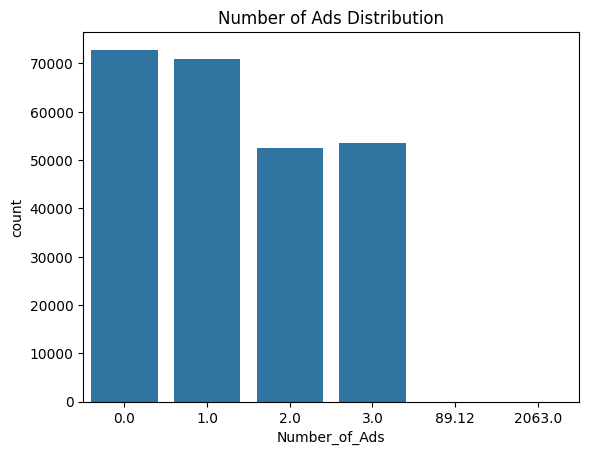

In [240]:
# 1. Episode_Length_minutes
sns.countplot(x = 'Episode_Length_minutes', data = test)
plt.title('Episode Length Distribution')
plt.show()


# 3. Number_of_Ads
sns.countplot(x='Number_of_Ads', data=test)
plt.title('Number of Ads Distribution')
plt.show()

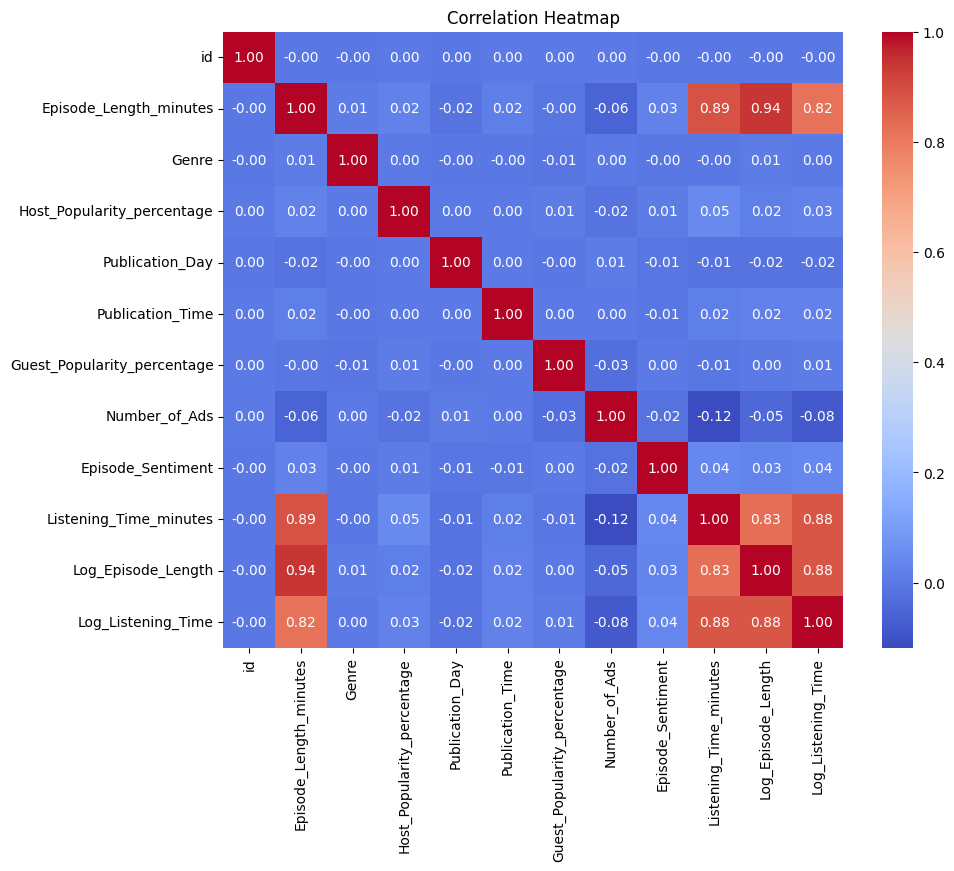

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 변수 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


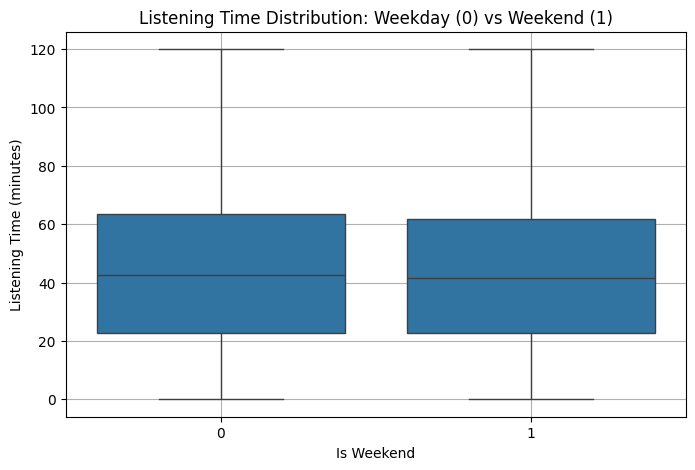

In [242]:
# 주중(0) / 주말(1) 피처 생성
train['Is_Weekend'] = train['Publication_Day'].apply(lambda x: 1 if x >= 5 else 0)

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Is_Weekend', y='Listening_Time_minutes', data=train)
plt.title('Listening Time Distribution: Weekday (0) vs Weekend (1)')
plt.xlabel('Is Weekend')
plt.ylabel('Listening Time (minutes)')
plt.grid(True)
plt.show()


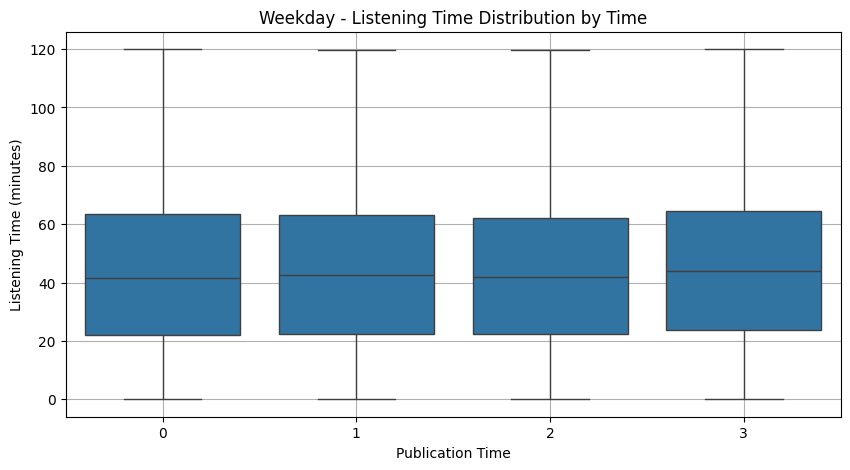

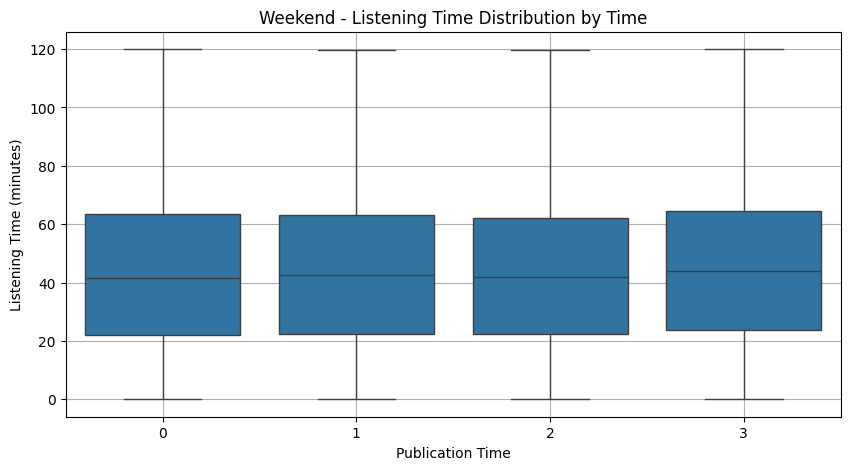

In [243]:
import matplotlib.pyplot as plt

# 주중 데이터
weekday_train = train[train['Is_Weekend'] == 0]
# 주말 데이터
weekend_train = train[train['Is_Weekend'] == 1]

# 주중 시간대별 Listening Time 분포
plt.figure(figsize=(10, 5))
sns.boxplot(x='Publication_Time', y='Listening_Time_minutes', data=weekday_train)
plt.title('Weekday - Listening Time Distribution by Time')
plt.xlabel('Publication Time')
plt.ylabel('Listening Time (minutes)')
plt.grid(True)
plt.show()

# 주말 시간대별 Listening Time 분포
plt.figure(figsize=(10, 5))
sns.boxplot(x='Publication_Time', y='Listening_Time_minutes', data=weekday_train)
plt.title('Weekend - Listening Time Distribution by Time')
plt.xlabel('Publication Time')
plt.ylabel('Listening Time (minutes)')
plt.grid(True)
plt.show()


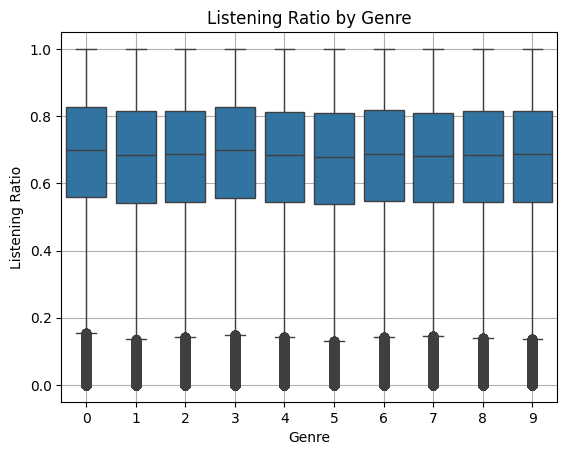

In [244]:
train['Listening_Ratio'] = train['Listening_Time_minutes'] / train['Episode_Length_minutes']
# 장르별 청취 비율 박스플롯
sns.boxplot(x='Genre', y='Listening_Ratio', data=train)
plt.title('Listening Ratio by Genre')
plt.xlabel('Genre')
plt.ylabel('Listening Ratio')
plt.grid(True)
plt.show()


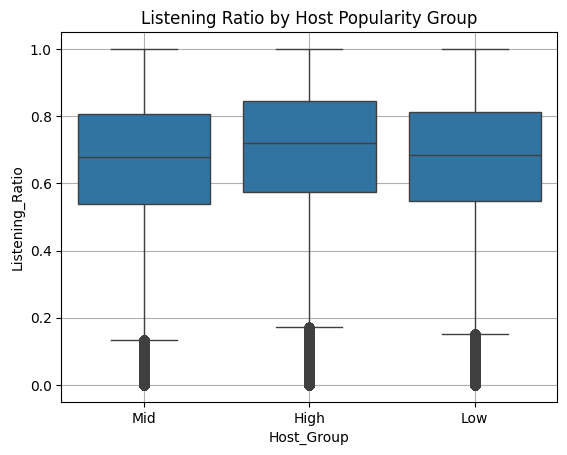

In [245]:
# 인기 상위 10%, 하위 10% 기준
host_80 = train['Host_Popularity_percentage'].quantile(0.8)
host_20 = train['Host_Popularity_percentage'].quantile(0.2)

# 상위/하위 그룹 구분
train['Host_Group'] = train['Host_Popularity_percentage'].apply(lambda x: 'High' if x >= host_80 else ('Low' if x <= host_20 else 'Mid'))

# 박스플롯으로 청취 비율 비교
sns.boxplot(x='Host_Group', y='Listening_Ratio', data=train)
plt.title('Listening Ratio by Host Popularity Group')
plt.grid(True)
plt.show()


In [246]:
# 상위 20% 기준값 계산
host_80_threshold = train['Host_Popularity_percentage'].quantile(0.8)

# Is_Host_High_Popularity 피처 생성
train['Is_Host_High_Popularity'] = train['Host_Popularity_percentage'].apply(lambda x: 1 if x >= host_80_threshold else 0)

# 확인
print(f'Host Popularity 상위 20% 기준값: {host_80_threshold:.2f}')
train[['Host_Popularity_percentage', 'Is_Host_High_Popularity']].head()


host_80_threshold_test = test['Host_Popularity_percentage'].quantile(0.8)

# Is_Host_High_Popularity 피처 생성
test['Is_Host_High_Popularity'] = test['Host_Popularity_percentage'].apply(lambda x: 1 if x >= host_80_threshold_test else 0)

# 확인
print(f'Host Popularity 상위 20% 기준값: {host_80_threshold_test:.2f}')
test[['Host_Popularity_percentage', 'Is_Host_High_Popularity']].head()



Host Popularity 상위 20% 기준값: 82.98
Host Popularity 상위 20% 기준값: 83.04


,Host_Popularity_percentage,Is_Host_High_Popularity
0,38.11,0
1,71.29,0
2,67.89,0
3,23.40,0
4,58.10,0


게스트 인기도 상위 25% 기준값: 71.12


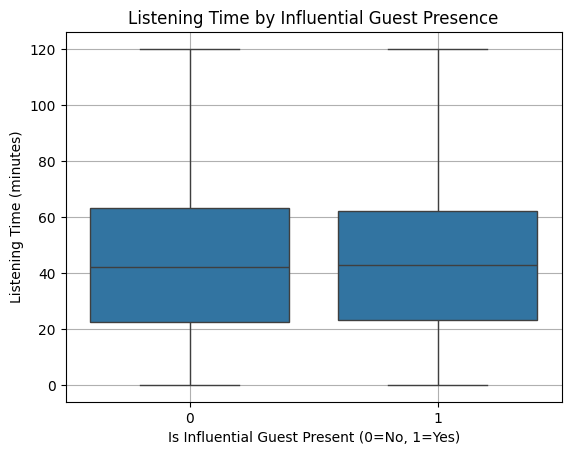

In [247]:
# 상위 25% 기준값 계산
guest_75_quantile = train['Guest_Popularity_percentage'].quantile(0.75)
print(f'게스트 인기도 상위 25% 기준값: {guest_75_quantile:.2f}')
# 상위 25%만 진짜 영향력 있는 게스트로 간주
train['Is_Influential_Guest'] = train['Guest_Popularity_percentage'].apply(lambda x: 1 if x >= guest_75_quantile else 0)
sns.boxplot(x='Is_Influential_Guest', y='Listening_Time_minutes', data=train)
plt.title('Listening Time by Influential Guest Presence')
plt.xlabel('Is Influential Guest Present (0=No, 1=Yes)')
plt.ylabel('Listening Time (minutes)')
plt.grid(True)
plt.show()



## Modeling

In [248]:
import lightgbm as lgb
from lightgbm import LGBMRegressor, early_stopping, log_evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# # 피처 및 타겟 정의
features = [
    'Episode_Length_minutes',
    'Is_Host_High_Popularity',
    'Host_Popularity_percentage',
    'Guest_Popularity_percentage',
    'Number_of_Ads',
    'Episode_Sentiment',
    'Genre',
    'Publication_Day',
    'Publication_Time'
]

X = train[features]
y = train['Listening_Time_minutes']

# # 훈련/검증 데이터 분리
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# # LightGBM 모델 생성
# model = LGBMRegressor(
#     objective='regression',
#     learning_rate=0.05,
#     num_leaves=31,
#     n_estimators=1000,
#     random_state=42
# )

# # 모델 학습 (callbacks 방식으로 early stopping)
# model.fit(
#     X_train, y_train,
#     eval_set=[(X_valid, y_valid)],
#     callbacks=[early_stopping(stopping_rounds=50), log_evaluation(100)]
# )

# # 검증 데이터 예측
# y_pred = model.predict(X_valid)

# # RMSE 평가
# rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
# print(f'Validation RMSE: {rmse:.4f}')


In [249]:
# from sklearn.model_selection import RandomizedSearchCV

# model = LGBMRegressor(objective='regression', random_state=42, n_jobs=-1)

# param_dist = {
#     'learning_rate': [0.01, 0.02, 0.03],
#     'num_leaves': [31, 50, 70, 100],  
#     'max_depth': [6, 8, 10, 12],
#     'feature_fraction': [0.7, 0.8, 0.9],
#     'bagging_fraction': [0.7, 0.8, 0.9],
#     'bagging_freq': [0, 5],
#     'min_child_samples': [20, 30, 50],
#     'n_estimators': [500, 1000, 1500]  
# }

# # RandomizedSearch 설정
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_dist,
#     n_iter=20,  
#     scoring='neg_root_mean_squared_error',
#     cv=3,
#     verbose=2,
#     random_state=42
# )

# # 학습
# random_search.fit(X, y)

# # 최적 파라미터와 성능
# print(f'Best Params: {random_search.best_params_}')
# print(f'Best CV RMSE: {-random_search.best_score_:.4f}')


In [250]:
# from sklearn.model_selection import KFold
# from lightgbm import LGBMRegressor, early_stopping, log_evaluation


# # KFold 설정 (5-Fold 권장)
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # 성능 저장용 리스트
# cv_rmse = []

# # 각 Fold별 학습 및 평가
# for fold, (train_idx, valid_idx) in enumerate(kf.split(X)):
#     print(f'\n---- Fold {fold+1} ----')
    
#     X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
#     y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    
#     # 업그레이드된 파라미터로 모델 정의
#     model = LGBMRegressor(
#         objective='regression',
#         learning_rate=0.02,   # 미세 조정
#         num_leaves=256,       # 복잡도 증가
#         max_depth=12,         
#         feature_fraction=0.85,
#         bagging_fraction=0.9,
#         bagging_freq=5,
#         min_child_samples=30,
#         n_estimators=5000,    # Early stopping과 함께 사용
#         max_bin=512,
#         random_state=42,
#         n_jobs=-1
#     )
    
#     # 모델 학습 with Early Stopping
#     model.fit(
#         X_train, y_train,
#         eval_set=[(X_valid, y_valid)],
#         callbacks=[
#             early_stopping(stopping_rounds=100),  # 개선 없으면 조기 종료
#             log_evaluation(200)                   # 200번마다 로그 출력
#         ]
#     )
    
#     # 예측 및 RMSE 계산
#     y_pred = model.predict(X_valid)
#     rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
#     cv_rmse.append(rmse)
#     print(f'Fold {fold+1} RMSE: {rmse:.4f}')

# # 전체 CV 평균 RMSE 출력
# mean_rmse = np.mean(cv_rmse)
# print(f'\nAverage CV RMSE: {mean_rmse:.4f}')


In [251]:
# 1. 전체 데이터로 최종 모델 학습
preds_list = []

for seed in [42, 2025, 7]:
    final_model = LGBMRegressor(
        objective='regression',
        learning_rate=0.01,
        num_leaves=512,
        max_depth=14,
        feature_fraction=0.9,
        bagging_fraction=0.9,
        bagging_freq=3,
        min_child_samples=20,
        n_estimators=10000,
        max_bin=1024,
        random_state=seed,
        n_jobs=-1
    )
    # 전체 train 데이터로 학습
    final_model.fit(X, y)

    # test 피처셋
    X_test = test[features]  # features는 train에서 사용한 동일 리스트
    preds = final_model.predict(X_test)
    preds_list.append(preds)

final_preds = np.mean(preds_list, axis=0)


# 3. 예측
# test_preds = final_model.predict(X_test)


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3102
[LightGBM] [Info] Number of data points in

In [252]:
submission = pd.DataFrame({
    'id': test['id'],
    'Listening_Time_minutes': final_preds
})

submission.to_csv('submission.csv', index=False)


In [253]:
submission.describe()

,id,Listening_Time_minutes
count,250000.000000,250000.000000
mean,874999.500000,45.563164
std,72168.927986,23.874893
min,750000.000000,-3.067652
25%,812499.750000,26.736976
50%,874999.500000,44.912980
75%,937499.250000,64.275137
max,999999.000000,125.691503
